In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [139]:
train_data = pd.read_csv("Train.csv")
train_data = train_data.replace("null bhp", pd.NA).dropna()
train_features = train_data.shape[0]
test_data = pd.read_csv("Test.csv")
test_data = test_data.replace("null bhp", pd.NA).dropna()
total_data = pd.concat([train_data, test_data], axis=0)
print(train_features)


3649


In [140]:
data = total_data.drop(['Name',total_data.columns[0], 'Price' ], axis=1)
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').astype(float)
data['Power'] = data['Power'].str.replace(' bhp', '').str.strip().astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').str.strip().astype(float)
y = total_data['Price']
data_cat =data.select_dtypes(include=['object'])  
data_num = data.select_dtypes(include=['number'])
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 
nan_count = data_proc.isna().sum()
data_proc.columns.tolist()


['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_Petrol',
 'Transmission_Manual',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third']

In [141]:
X_train = data_proc.iloc[:train_features]
X_test = data_proc.iloc[train_features:]
y_train = y.iloc[:train_features]
print(y_train)
y_test = y.iloc[train_features:]
print(y_test)
mse_values = []

0        5.00
1        8.37
2        4.50
3        0.85
4        2.65
        ...  
3745    18.75
3746     6.25
3747     1.45
3748     6.60
3749     2.35
Name: Price, Length: 3649, dtype: float64
0        6.95
1        2.90
2        6.28
3       13.80
4        2.75
        ...  
1245     6.80
1246     0.80
1247     8.27
1248     6.00
1249     9.51
Name: Price, Length: 1224, dtype: float64


In [ ]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 800):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_mse = float('inf')
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            mse = np.mean((y_predicted - y) ** 2)
            mse_values.append(mse)
        print(self.weights)
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

[ 4.02675786  1.0905525   8.05268174 ... 11.36012267  8.73475916
 10.22471128]


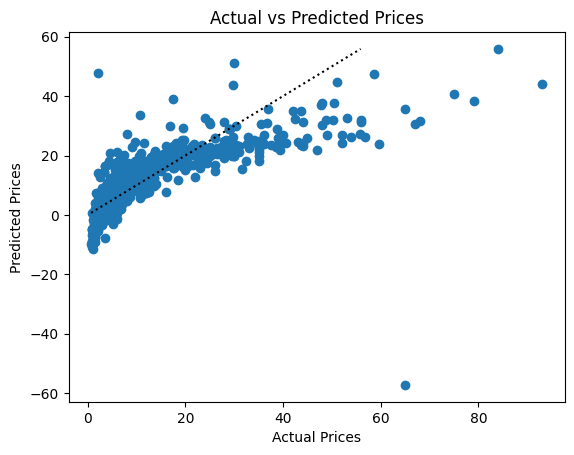

In [143]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(predictions)], [min(y_test), max(predictions)], 'k:')
plt.show()

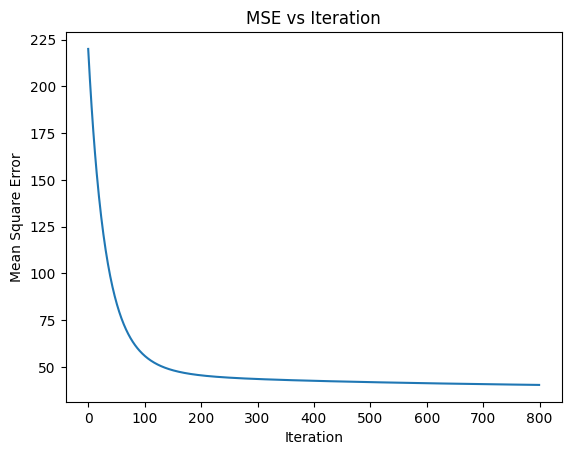

In [144]:
plt.plot(mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Iteration')
plt.show()

In [145]:
total_sum = np.sum((y_test - np.mean(y_test)) ** 2)
residual_sum = np.sum((y_test - predictions) ** 2)
r2 = 1 - (residual_sum/total_sum)
print(r2)
print(mse_values[-1])

0.589845600295581
40.43547616173025


In [146]:
model = LinearRegression()

# 2. Fit the model to the training data
model.fit(X_train, y_train)

# 3. Make predictions (on the training data in this case)
y_predict = model.predict(X_test)

# 4. Calculate the R² score
r2 = r2_score(y_test, y_predict)

print(f"R² score: {r2}")

R² score: 0.589845600295581
